**CNN with different Filters and Paddings**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Build CNN model
def build_model():
    inputs = Input(shape=(32, 32, 3))

    # Convolutional Block 1 (stride 1, padding 'same', filter size 3x3)
    x = Conv2D(32, (3, 3), strides=1, padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional Block 2 (stride 2, padding 'valid', filter size 5x5)
    x = Conv2D(64, (5, 5), strides=2, padding='valid', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional Block 3 (stride 1, padding 'same', filter size 3x3)
    x = Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,786 (1.05 MB)

 Trainable params: 275,338 (1.05 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 109ms/step - accuracy: 0.3307 - loss: 1.9699 - val_accuracy: 0.4953 - val_loss: 1.3774
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 110ms/step - accuracy: 0.5238 - loss: 1.3323 - val_accuracy: 0.5880 - val_loss: 1.1609
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 107ms/step - accuracy: 0.5883 - loss: 1.1575 - val_accuracy: 0.6049 - val_loss: 1.0930
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 105ms/step - accuracy: 0.6306 - loss: 1.0319 - val_accuracy: 0.6582 - val_loss: 0.9568
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 108ms/step - accuracy: 0.6656 - loss: 0.9471 - val_accuracy: 0.6163 - val_loss: 1.1233


In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6120 - loss: 1.1191
Test Accuracy: 0.6115


**Visualizing Feature Maps from Different Layers**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


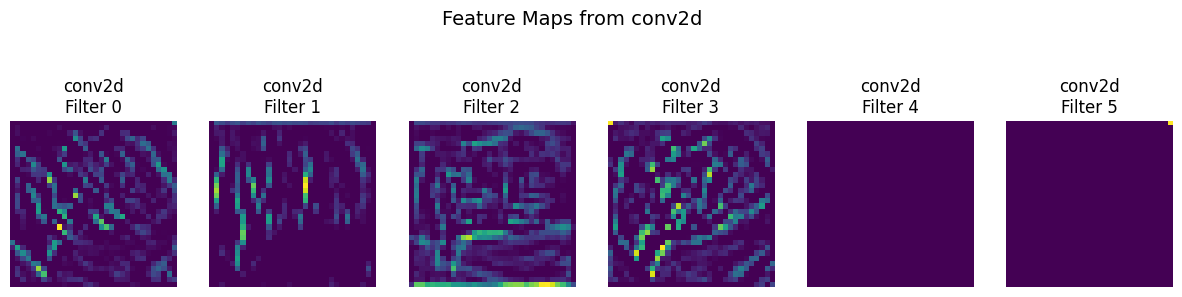

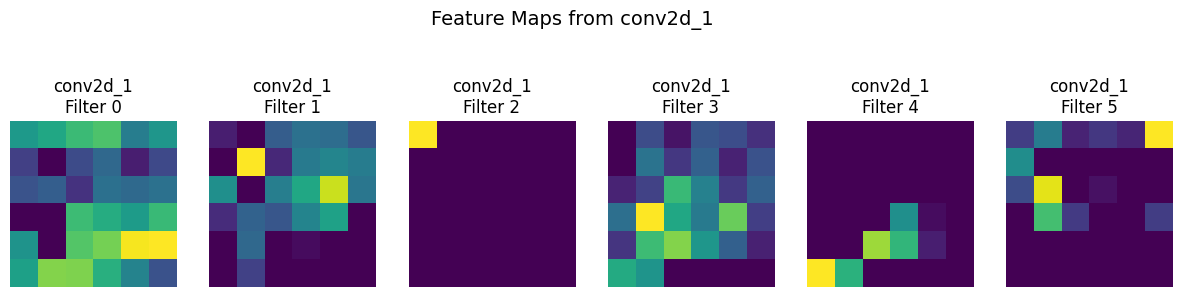

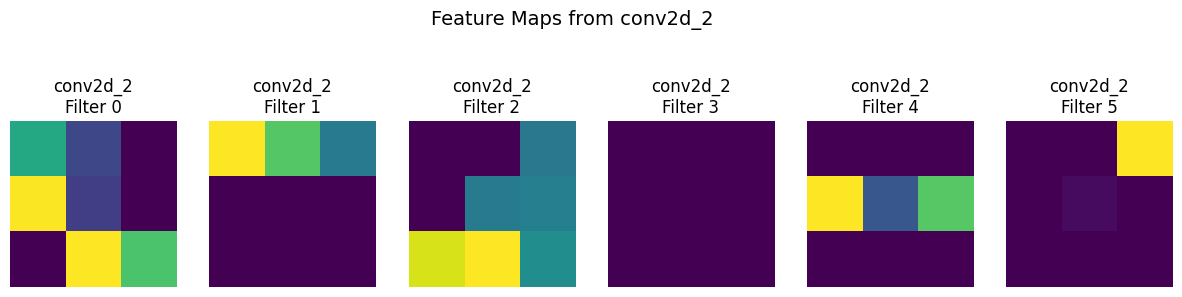

In [ ]:
# Select a sample image to visualize
sample_img = x_test[0:1]

# Create intermediate models to get outputs of each conv layer
layer_outputs = [layer.output for layer in model.layers if 'conv2d' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get feature maps
feature_maps = activation_model.predict(sample_img)

# Function to plot feature maps
def plot_feature_maps(feature_map, layer_name, n_filters=6):
    plt.figure(figsize=(15, 4))
    for i in range(n_filters):
        if i < feature_map.shape[-1]:  # Ensure filter exists
            plt.subplot(1, n_filters, i+1)
            plt.imshow(feature_map[0, :, :, i], cmap='viridis')
            plt.title(f'{layer_name}\nFilter {i}')
            plt.axis('off')
    plt.suptitle(f'Feature Maps from {layer_name}', fontsize=14)
    plt.show()

# Show feature maps from each Conv layer
conv_layer_names = [layer.name for layer in model.layers if 'conv2d' in layer.name]
for fmap, name in zip(feature_maps, conv_layer_names):
    plot_feature_maps(fmap, name)